# Doc 6 Fleet-level Emission Factors

C:\Users\Ricky Chen\AppData\Local\Temp\ipykernel_17896\2841779172.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  set2_colors = cm.get_cmap('Set2')


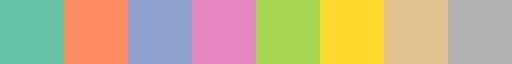

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

import matplotlib.cm as cm
set2_colors = cm.get_cmap('Set2')
set2_colors

## 1 Data

In [2]:
# vehicle-level emission facotr
with open("data/vehicle_ef_cltc.pkl", 'rb') as f:
    ef_cltc = pickle.load( f)
with open("data/vehicle_ef_chengdu.pkl", 'rb') as f:
    ef_chengdu = pickle.load(f)

In [3]:
# penetration rate
penetration = pd.read_excel("data/ev_penetration.xlsx")

In [4]:
penetration

,year,population,ev population,penetration,bev%
0,2016,184000000,1014000,0.005511,NaN
1,2017,217000000,1530000,0.007051,NaN
2,2018,231000000,2610000,0.011299,NaN
3,2019,260000000,3810000,0.014654,0.8120
4,2020,281000000,4920000,0.017509,0.8100
5,2021,302000000,7832160,0.025934,0.8160
6,2022,319000000,13100000,0.041066,0.7980
7,2023,336000000,20410000,0.060744,0.7600
8,2024,353000000,31400000,0.088952,0.7034


## 2 Fleet-level emission factor

In [5]:
# cltc-p
ef_cltc['Fleet EF weak linear'] = ef_cltc['ICEV EF linear'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_cltc['EV weak EF linear'].to_numpy() * penetration['penetration'].to_numpy()
ef_cltc['Fleet EF weak power'] = ef_cltc['ICEV EF power'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_cltc['EV weak EF power'].to_numpy() * penetration['penetration'].to_numpy()
ef_cltc['Fleet EF strong linear'] = ef_cltc['ICEV EF linear'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_cltc['EV strong EF linear'].to_numpy() * penetration['penetration'].to_numpy()
ef_cltc['Fleet EF strong power'] = ef_cltc['ICEV EF power'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_cltc['EV strong EF power'].to_numpy() * penetration['penetration'].to_numpy()

In [6]:
# chengdu
ef_chengdu['Fleet EF weak linear'] = ef_chengdu['ICEV EF linear'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_chengdu['EV weak EF linear'].to_numpy() * penetration['penetration'].to_numpy()
ef_chengdu['Fleet EF weak power'] = ef_chengdu['ICEV EF power'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_chengdu['EV weak EF power'].to_numpy() * penetration['penetration'].to_numpy()
ef_chengdu['Fleet EF strong linear'] = ef_chengdu['ICEV EF linear'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_chengdu['EV strong EF linear'].to_numpy() * penetration['penetration'].to_numpy()
ef_chengdu['Fleet EF strong power'] = ef_chengdu['ICEV EF power'].to_numpy() * (1 - penetration['penetration'].to_numpy()) + ef_chengdu['EV strong EF power'].to_numpy() * penetration['penetration'].to_numpy()

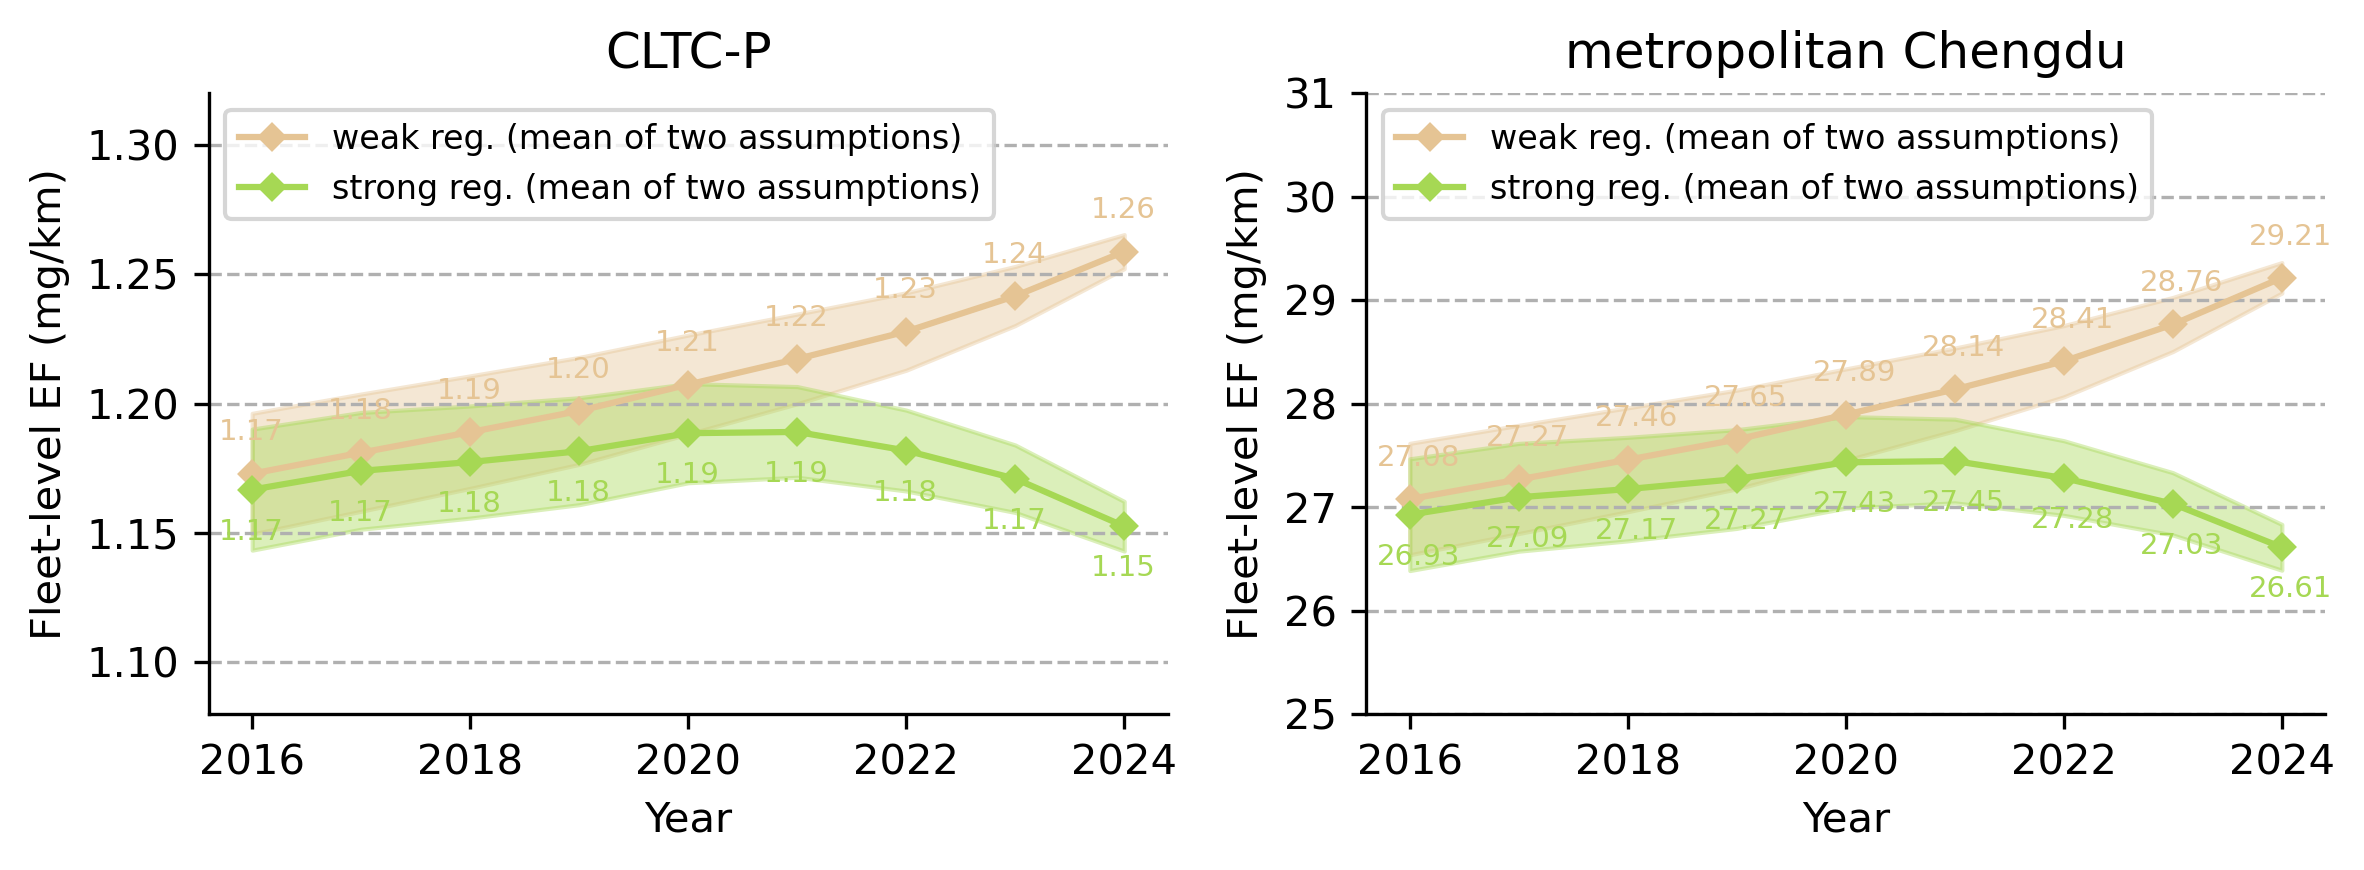

In [7]:
# fleet-level EF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

# colors
color_weak = set2_colors(6)
color_strong = set2_colors(4)

def plot(ax, ef, reg, color):
    x = ef.index
    linear = ef[f'Fleet EF {reg} linear'].to_numpy()
    power = ef[f'Fleet EF {reg} power'].to_numpy()
    mean = (linear + power) / 2
    ax.fill_between(x, linear, power, color=color, alpha=0.4)
    ax.plot(x, mean, 'D-', markersize=4, color=color,  label='%s reg. (mean of two assumptions)' % reg)
    for x, y in zip(x, mean):  # annotation
        ax.annotate(f'{y:.2f}', 
                    xy=(x, y), 
                    xytext= (-8,8) if reg == 'weak' else (-8,-12), 
                    textcoords='offset points', 
                    fontsize=7, 
                    color=color)

# fig 1: cltc
## EV weak
plot(ax1, ef_cltc, 'weak', color_weak)
## EV strong
plot(ax1, ef_cltc, 'strong', color_strong)
## axis
ax1.set_title('CLTC-P')
ax1.set_ylim(1.08,1.32)

# fig 2: chengdu
## EV weak
plot(ax2, ef_chengdu, 'weak', color_weak)
## EV strong
plot(ax2, ef_chengdu, 'strong', color_strong)
## axis
ax2.set_title('metropolitan Chengdu')
ax2.set_ylim(25,31)

# axis settings
for ax in (ax1, ax2):
    ax.set_xlabel('Year')
    ax.set_ylabel('Fleet-level EF (mg/km)')
    ax.legend(loc='upper left', ncols=1, fontsize=8)
    ax.grid(axis='y', linestyle="--", zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
# fig.savefig('figures/fleet ef.jpg', bbox_inches='tight', dpi=1000)

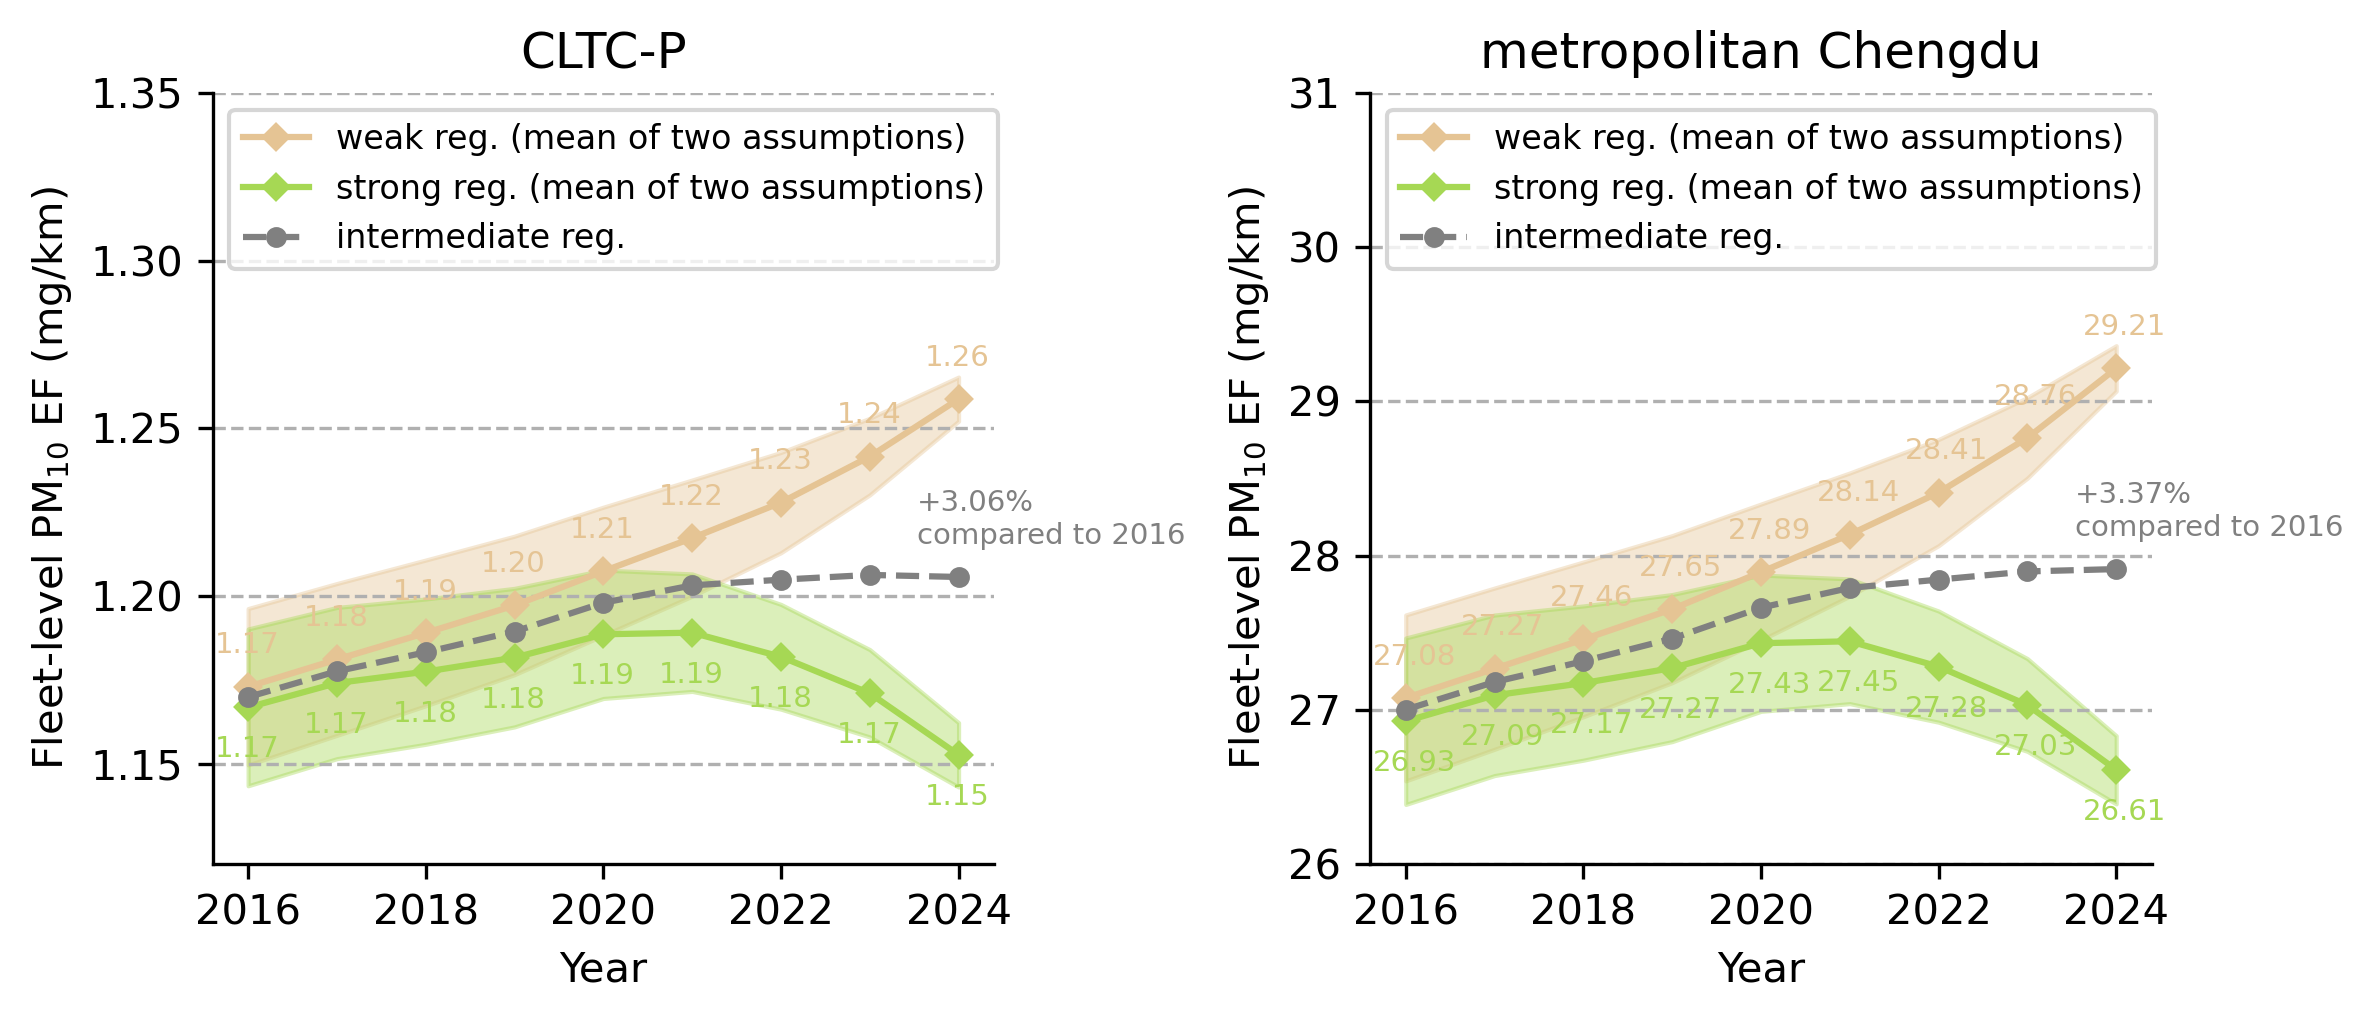

In [8]:
# fleet-level EF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3.5))

# colors
color_weak = set2_colors(6)
color_strong = set2_colors(4)

def plot(ax, ef, reg, color):
    x = ef.index
    linear = ef[f'Fleet EF {reg} linear'].to_numpy()
    power = ef[f'Fleet EF {reg} power'].to_numpy()
    mean = (linear + power) / 2
    ax.fill_between(x, linear, power, color=color, alpha=0.4)
    ax.plot(x, mean, 'D-', markersize=4, color=color,  label='%s reg. (mean of two assumptions)' % reg)
    for x, y in zip(x, mean):  # annotation
        ax.annotate(f'{y:.2f}', 
                    xy=(x, y), 
                    xytext= (-8,8) if reg == 'weak' else (-8,-12), 
                    textcoords='offset points', 
                    fontsize=7, 
                    color=color)
        
def plot_mean(ax, ef, color):
    x = ef.index
    weak_linear = ef['Fleet EF weak linear'].to_numpy()
    weak_power = ef['Fleet EF weak power'].to_numpy()
    strong_linear = ef['Fleet EF strong linear'].to_numpy()
    strong_power = ef['Fleet EF strong power'].to_numpy()
    weak_mean = (weak_linear + weak_power) / 2
    strong_mean = (strong_linear + strong_power) / 2
    mean = (weak_mean + strong_mean) / 2
    ax.plot(x, mean, 'o--', markersize=4, color=color,  label="intermediate reg.")
    # inc rate
    mean_2016, mean_2024 = mean[0], mean[-1]
    inc_rate = (mean_2024 - mean_2016) / mean_2016 * 100
    ax.annotate('+%.2f%%\ncompared to 2016' % inc_rate, 
                xy=(2024, mean_2024), 
                xytext= (-10,8), 
                textcoords='offset points', 
                fontsize=7, 
                color=color)
# fig 1: cltc
## EV weak
plot(ax1, ef_cltc, 'weak', color_weak)
## EV strong
plot(ax1, ef_cltc, 'strong', color_strong)
# mean
plot_mean(ax1, ef_cltc, 'gray')
## axis
ax1.set_title('CLTC-P')
ax1.set_ylim(1.12,1.35)

# fig 2: chengdu
## EV weak
plot(ax2, ef_chengdu, 'weak', color_weak)
## EV strong
plot(ax2, ef_chengdu, 'strong', color_strong)
# mean
plot_mean(ax2, ef_chengdu, 'gray')
## axis
ax2.set_title('metropolitan Chengdu')
ax2.set_ylim(26,31)

# axis settings
for ax in (ax1, ax2):
    ax.set_xlabel('Year')
    ax.set_ylabel('Fleet-level PM$_{10}$ EF (mg/km)')
    ax.legend(loc='upper left', ncols=1, fontsize=8)
    ax.grid(axis='y', linestyle="--", zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
fig.savefig('figures/fleet ef.jpg', bbox_inches='tight', dpi=1000)

In [9]:
ef_cltc['Fleet EF weak'] = (ef_cltc['Fleet EF weak linear'] + ef_cltc['Fleet EF weak power']) * 0.5
ef_cltc['Fleet EF strong'] = (ef_cltc['Fleet EF strong linear'] + ef_cltc['Fleet EF strong power']) * 0.5
weak_inc = (ef_cltc['Fleet EF weak'][2024] - ef_cltc['Fleet EF weak'][2016]) / ef_cltc['Fleet EF weak'][2016]
strong_inc = (ef_cltc['Fleet EF strong'][2024] - ef_cltc['Fleet EF strong'][2016]) / ef_cltc['Fleet EF strong'][2016]
weak_inc, strong_inc

(0.07314337195386748, -0.01212950727027174)

In [10]:
ef_chengdu['Fleet EF weak'] = (ef_chengdu['Fleet EF weak linear'] + ef_chengdu['Fleet EF weak power']) * 0.5
ef_chengdu['Fleet EF strong'] = (ef_chengdu['Fleet EF strong linear'] + ef_chengdu['Fleet EF strong power']) * 0.5
weak_inc = (ef_chengdu['Fleet EF weak'][2024] - ef_chengdu['Fleet EF weak'][2016]) / ef_chengdu['Fleet EF weak'][2016]
strong_inc = (ef_chengdu['Fleet EF strong'][2024] - ef_chengdu['Fleet EF strong'][2016]) / ef_chengdu['Fleet EF strong'][2016]
weak_inc, strong_inc

(0.07891148275908601, -0.011702114016512914)